In [82]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import time
import xgboost as xgb
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import pipeline, model_selection
from sklearn import pipeline, grid_search
#from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, make_scorer

import re

import random
random.seed(2017)

pd.set_option("display.max_colwidth", 1000)

%matplotlib inline

import matplotlib


In [6]:
queries = pd.read_pickle('FEATURES_WITH_TEXT_1')

In [11]:
queries.shape

(240760, 67)

In [12]:
data = queries.iloc[:5000]

In [13]:
def strip_query
data['query'].map(lambda q: )

,query,product_uid,product_title,product_description,brand,attrs,brand_none,brand_unbranded,brand_hampton,brand_kohler,...,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43
id,,,,,,,,,,,,,,,,,,,,,
1,90 unitsdegrees bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
2,angle bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
3,l bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight

In [15]:
ee = pd.read_csv('/Users/rbekbolatov/repos/gl/DataTeam/recurring_jobs/web-logs/web-logs-oozie/updates/emailids.csv')

In [19]:
ee.head()

,email_contact_id,professional_id
0,1502291,369544
1,1502296,1736599
2,1502297,952970
3,1502297,952970
4,1502298,8209


In [31]:
a = ee.groupby('email_contact_id')

In [36]:
a.groups

{1503232: [784, 787],
 1503233: [788],
 1503234: [790],
 1503235: [791],
 1503236: [792],
 1503237: [793],
 1503238: [794],
 1503239: [795],
 1503240: [796],
 1503241: [797, 799],
 1503242: [800, 840],
 1503243: [801],
 1503246: [802],
 1503247: [803],
 1503248: [804],
 1503249: [805],
 1503250: [806],
 1503251: [807],
 1503252: [808],
 1503253: [809, 811, 1127],
 1503254: [810],
 1503255: [812],
 1503256: [813],
 1503257: [814],
 1503258: [815],
 1503259: [816, 818],
 1503260: [817],
 1503261: [819, 821],
 1503262: [820],
 1503263: [822],
 1503264: [823],
 1503265: [824],
 1503266: [825],
 1503267: [856, 857],
 1503271: [826],
 1503272: [827],
 1503273: [828],
 1503274: [829],
 1503275: [830],
 1503276: [831],
 1503277: [832],
 1503279: [833],
 1503280: [834],
 1503281: [835],
 1503282: [836],
 1503283: [837],
 1503284: [838],
 1503285: [839],
 1503286: [841],
 1503287: [842],
 1503288: [844],
 1503289: [843],
 1503290: [845],
 1503291: [846],
 1503292: [847],
 1503293: [848],
 150329

In [38]:
ee[ee['email_contact_id'] == 1503232]

,email_contact_id,professional_id
784,1503232,886413
787,1503232,886413


In [49]:
queries

,query,product_uid,product_title,product_description,brand,attrs,brand_none,brand_unbranded,brand_hampton,brand_kohler,...,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43
id,,,,,,,,,,,,,,,,,,,,,
1,90 unitsdegrees bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
2,angle bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
3,l bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight

In [51]:
idx_train = pd.read_pickle('data/LABELS_TRAIN.df')
idx_test = pd.read_pickle('data/LABELS_TEST.df')

In [57]:
data = idx_train.join(queries)

In [79]:
data[data['product_title'].apply(lambda s: 'kit' in s.split())]

(4332, 68)

In [113]:
bb

,relevance,query,product_uid,product_title,product_description,brand,attrs,brand_none,brand_unbranded,brand_hampton,...,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43
id,,,,,,,,,,,,,,,,,,,,,
644,2.67,combo power tool kit,100105,ridgid xby 18 unitsvolts lithium ion lithiumion cordless drill impact driver combo kit 2 tool,ridgid 18 unitsvolts drill impact driver combo must combo kit incredible price 18 unitsvolts compact drill impact driver best bestin class torque demanding applications powered xbyhyper lithium technology innovative battery technology built high performance free registration kit covered life free batteries free parts free service life includes r86008 drill r86034 impact driver 2 r840085 1p5 ah hyper lithium ion lithiumion batteries r86092 charger contractor bag 2 bits auxiliary handle 2 belt hooks operator manuals california residents nbsp proposition 65 unitsinches formation compact drill 4 pole open frame motor delivers 535 unitsinches lbs torque more compact size impact driver equipped high torque output delivers 1750 unitsinches lbs torque grip light technology engages light xbysimply holding tool impact driver 1 handed quick load quickload bit holder makes bit changes quicker easier snap load collet simple ejecting bit release removable belt hooks keep tool immediate reach bat...,ridgid,certifications listings 1 ul listed bullet 04 impact driver 1 handed quick load quickload bit holder makes bit changes quicker easier snap load collet simple ejecting bit release product width 8p346 battery power type lithium ion cordless tool type combo kit power tool product type cordless bullet 06 battery gauge always know charge battery size 18 unitsvolts bullet 01 compact drill 4 pole open frame motor delivers 535 unitsinches lbs torque more compact size bullet 03 grip light technology engages light xbysimply holding tool bullet 02 impact driver equipped high torque output delivers 1750 unitsinches lbs torque bullet 05 removable belt hooks keep tool immediate reach cordless corded cordless color family orange product height 9p29 product depth 13p32 batteries included yes tools included drill impact driver tools product type power tool mfg brand name ridgid number batteries included 2 number tools included 2 charger included yes battery amp hours 1p5 power tool features bag inc...,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
670,3.00,fiberglass repair kit,100111,prime line primeline fiberglass screening kit rolling tool,prime line primeline products fiberglass screening kit rolling tool comes 36 unitsinches xby 84 unitsinches section screen cloth 30 unitsfeet vinyl spline spline roller included installation window patio door screens 30 unitsfeet black vinyl spline approx 1d4 unitsinches diameter 36 unitsinches xby 84 unitsinches charcoal fiberglass screening screen cloth spline inserte inserted together into spline groove frame xbygentle pressure rolling tool includes rolling tool,prime line primeline,product width 10p5 package quantity 1 color black bullet 03 36 unitsinches xby 84 unitsinches charcoal fiberglass screening bullet 02 30 unitsfeet black vinyl spline approx 1d4 unitsinches diameter bullet 05 includes rolling tool bullet 04 screen cloth spline inserte inserted together into spline groove frame xbygentle pressure rolling tool mfg brand name prime line primeline color family blacks product height 11 bullet 01 window patio door screens builders hardware product type screen accessory product depth 1p875 hardware finish family black,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
671,1.67,fiberglass repair kit,100111,prime line primeline fiberglass screening kit rolling tool,prime line primeline products fiberglass screening kit rolling tool comes 36 unitsinches xby 84 unitsinches section screen cloth 30 unitsfeet vinyl spline spline roller included installation window patio door screens 30 unitsfeet black vinyl spline approx 1d4 unitsinches diameter 36 unitsinches xby 84 unitsinches charcoal fiberglass screening screen clo

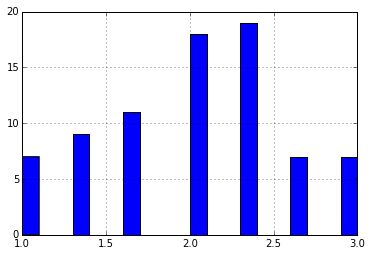

In [171]:
aa = data[
    (data['query'].apply(lambda s: 'ground' in s.split()))
    ]
    
#     (data['product_title'].apply(lambda s: 'kit' in s.split())) &
#     (data['query'].apply(lambda s: 'kit' not in s.split()))
#      ]
aa['relevance'].hist(bins=20)

In [109]:
bb = data[
    (data['product_title'].apply(lambda s: 'kit' in s.split())) &
    (data['query'].apply(lambda s: 'kit'  in s.split()))
    ]

In [93]:
aa = data[data['product_title'].apply(lambda s: 'kit' in s.split())]
bb = data[~data['product_title'].apply(lambda s: 'kit' in s.split())]

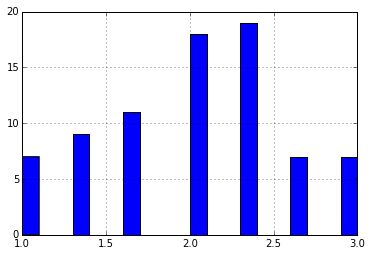

In [170]:
aa['relevance'].hist(bins=20)

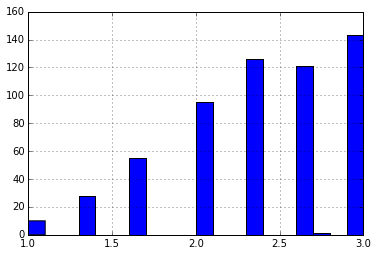

In [111]:
bb['relevance'].hist(bins=20)

In [96]:
aa[aa['relevance'] == 3.0]

,relevance,query,product_uid,product_title,product_description,brand,attrs,brand_none,brand_unbranded,brand_hampton,...,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43
id,,,,,,,,,,,,,,,,,,,,,
533,3.0,rustoleum epoxy,100086,rust oleum rustoleum epoxy shield 2 unitsgallons tan 2 part high gloss highgloss epoxy garage floor coating kit,rust oleum rustoleum epoxy shield 2 unitsgallons tan high gloss highgloss 2 part epoxy garage floor coating kit easy apply brush garage concrete surfaces epoxy 2 part water based waterbased formula provides ideal protection high gloss sheen tan offers handsome appearance decorative chips included appealing look california residents nbsp proposition 65 unitsinches formation easy apply brush garage concrete surfaces epoxy 2 part water based waterbased formula provides ideal protection high gloss highgloss sheen tan offers handsome appearance decorative chips included appealing look finish up 500 unitssquareft 2 1d2 car garage complete coverage formulate formulated withstand wear abrasions resists damage xbygasoline anti freeze antifreeze motor oil salt hot tires easy clean soap water actual paint colors may vary screen onscreen printer representations,rust oleum rustoleum epoxy shield,skid resistant yes paint stain base material epoxy 2 part rgb value 163 136 112 bullet 04 decorative chips included appealing look bullet 06 formulate formulated withstand wear abrasions application method brush roll bullet 09 actual paint colors may vary screen onscreen printer representations bullet 08 easy clean soap water bullet 01 easy apply brush garage concrete surfaces bullet 03 high gloss highgloss sheen tan offers handsome appearance bullet 02 epoxy 2 part water based waterbased formula provides ideal protection bullet 05 finish up 500 unitssquareft 2 1d2 car garage complete coverage substrate surface use type concrete brick masonry stone bullet 07 resists damage xbygasoline anti freeze antifreeze motor oil salt hot tires color family browns tans interior paint stains product type concrete basement garage floor coating color finish tan paint stain clean up soap water number components formula 2 part time before recoating hours 24 container size 2 ga gallon gagallon dry to...,0.0,0.0,0.0,...,1,15,2,1.000000,14,2,14,1,1,14
630,3.0,landscape edging,100100,dimex easy flex 24 unitsfeet aluminum landscape edging project kit black,easy flex aluminum landscape edging xbydimex perfect choice homeowners contractors alike offering professional grade quality name speaks itself easy installation simply slide ends material together approximate 4 unitsinches overlap insert provided spikes 45 angle enjoy permanent virtually maintenance free maintenancefree solution infamous curb appeal dilemma easy flex rust rot become brittle like edgings straight runs curves create created ease made recycled material non toxic nontoxic excellent corrosion resistance around allaround environmentally friendly set available variety colors including silver black brown bronze green applications include landscape beds tree rings walkways pathways brick stone patios gardens drip edges more easy sliding installation rust rot crack become brittle creates straight runs curves ease permanent virtually maintenance free made recycled material limite limited lifetime warranty against manufacturers defects applications include landscape beds tree...,dimex,bullet 08 easy easyto install aluminum lawn edging landscape border bullet 02 rust rot crack become brittle package quantity 1 bullet 01 easy sliding installation landscape supply type non concrete edging bullet 03 creates straight runs curves ease material aluminum bullet 05 made recycled material bullet 04 permanent virtually maintenance free bullet 07 applications include landscape beds tree rings walkways pathways brick stone patio gardens drip edges bullet 06 limite limited lifetime warranty against manufacturers defects product width 288 width 125 unitsinches mfg brand name dimex hardware included yes colo

In [114]:
data

,relevance,query,product_uid,product_title,product_description,brand,attrs,brand_none,brand_unbranded,brand_hampton,...,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43
id,,,,,,,,,,,,,,,,,,,,,
2,3.00,angle bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
3,2.50,l bracket,100001,simpson strong tie strongtie 12 gauge angle,only angles make joints stronger they also provide more consistent straight corners simpson strong tie strongtie offers wide variety angles various sizes thicknesses handle light duty lightduty jobs projects where structural connection needed bent skewed match project outdoor projects those where moisture present use our zmax zinc coate coated zinccoate zinccoated connectors provide extra resistance against corrosion look z end model number versatile connector various 90 connections home repair projects stronger than angled nailing screw fastening alone help ensure joints consistently straight strong dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches made 12 gauge steel galvanized extra corrosion resistance install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws,simpson strong tie strongtie,product width 3 bullet 02 stronger than angled nailing screw fastening alone bullet 01 versatile connector various 90 connections home repair projects bullet 06 galvanized extra corrosion resistance bullet 03 help ensure joints consistently straight strong material galvanized steel bullet 05 made 12 gauge steel number pieces 1 bullet 07 install 10 d common nails 9 xby 1 1d2 unitsinches strong drive strongdrive sd screws bullet 04 dimensions 3 unitsinches xby 3 unitsinches xby 1 1d2 unitsinches product height 3 gauge 12 mfg brand name simpson strong tie strongtie product depth 1p5 product weight lb 0p26,0.0,0.0,0.0,...,0,0,0,0.000000,0,0,0,15,0,0
9,3.00,deck over,100002,behr premium textured deck over 1 unitsgallons sc 141 tugboat wood concrete coating,behr premium textured deckover innovative solid color coating bring weathered wood concrete back life advanced 100 acrylic resin formula creates durable coating tired worn out deck rejuvenating whole look best results sure properly prepare surface using applicable behr products displayed above california residents nbsp proposition 65 unitsinches formation revives wood composite decks railings porches boat docks also great concrete pool decks patios sidewalks 100 acrylic solid color coating resists cracking peeling conceals splinters cracks up 1d4 unitsinches provi

In [172]:
aaa.shape, bbb.shape

((51847, 68), (22220, 68))

In [249]:
from collections import defaultdict
import math

n = defaultdict(lambda : 0)
c = defaultdict(lambda : 0)
s = defaultdict(lambda : 0)

def cc(r):
    for w in r['query'].split():
        n[w] += 1
        c[w] += r['relevance']
        s[w] += r['relevance']*r['relevance']
     
    
aaa = data.loc[data.reset_index()['id'].sample(frac=0.7)]
bbb = data.loc[~data.index.isin(aaa.index)]

_ = aaa.apply(cc, axis=1)

cn = {}
cnd = {}
for w in c:
    cn[w] = c[w]*1.0/n[w]
    cnd[w] = math.sqrt( max(0,(s[w]*1.0/n[w]) - (cn[w]*cn[w])))

    
words = sorted([ (cn[te], cnd[te], nu, te) for nu, te in sorted([ (v, k) for k,v in n.items() if v > 50], reverse=True)])    


In [250]:
cncn = cn
cndcnd = cnd
wordswords = words

n = defaultdict(lambda : 0)
c = defaultdict(lambda : 0)
s = defaultdict(lambda : 0)

def cc(r):
    for w in r['query'].split():
        n[w] += 1
        c[w] += r['relevance']
        s[w] += r['relevance']*r['relevance']
     
    
aaa = data.loc[data.reset_index()['id'].sample(frac=0.7)]
bbb = data.loc[~data.index.isin(aaa.index)]

_ = bbb.apply(cc, axis=1)

cn = {}
cnd = {}
for w in c:
    cn[w] = c[w]*1.0/n[w]
    cnd[w] = math.sqrt( max(0,(s[w]*1.0/n[w]) - (cn[w]*cn[w])))

    
words = sorted([ (cn[te], cnd[te], nu, te) for nu, te in sorted([ (v, k) for k,v in n.items() if v > 7], reverse=True)])  

list_words = [w[3] for w in wordswords if ((w[2] < 2.30 and cn.get(w[3], 3) < 2.35) or (w[2] > 2.70 and cn.get(w[3], 0) > 2.65))]

In [251]:
len(words),len(wordswords)

(1508, 638)

In [253]:
list_words

[u'room',
 'ceramic',
 u'boxes',
 'heaters',
 u'rubbed',
 u'cordless',
 u'unfinished',
 u'faucets',
 u'elbow',
 u'undermount',
 u'polished',
 u'rust',
 u'sheds',
 u'dispenser',
 u'soap',
 u'camera',
 u'trimmers']

In [227]:
max([w[1] for w in words])

0.6421530143409464

In [235]:
words[0:3]

[(2.0281927710843375, 0.6083438798018113, 83, 'type'),
 (2.028582677165355, 0.4878891128848538, 127, u'model'),
 (2.0808108108108105, 0.5136508351240819, 74, 'cement')]

In [233]:
len([w[3] for w in words if w[2] < 2.30 or w[2] > 2.70])

470

In [192]:
21.3867/3 - (2.67/3)*2.67/3

6.3368

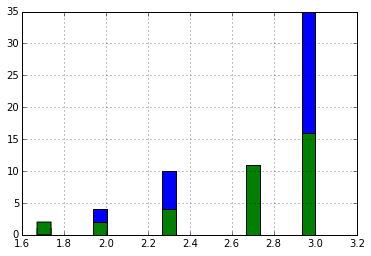

In [254]:
#'model', 'counter', 'frame', 'roof', 'high', 'electrical', 'parts', 'windows', 'concrete', 'l', 'home'
wordd = 'dispenser'

xx = aaa[
    (aaa['query'].apply(lambda s: wordd in s.split()))
    ]
xx['relevance'].hist(bins=20)

yy = bbb[
    (bbb['query'].apply(lambda s: wordd in s.split()))
    ]
yy['relevance'].hist(bins=20)

In [160]:
c['door'], n['door'], cn['door']

(4645.590000000004, 1950, 2.382353846153848)

In [256]:
queries.loc[65507]

query                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     4d4 pt post
product_uid                       

In [260]:
idx_train.relevance.mean()

2.3816337910270433